# Exploratory Data Analysis (EDA) 

## Importing dataset

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [5]:
# Load the dataset
df = pd.read_csv('/Users/gia/Downloads/Telco-Customer-Churn.csv')  
# Basic info about the dataset
print(" Dataset Info:")
print(df.info())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Display first 5 rows
df.head()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Indentifying missing values and anolmalies

In [7]:
# Convert 'TotalCharges' to numeric (some values may be blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN (anomaly detection)
print("\n Nulls in 'TotalCharges' after conversion:", df['TotalCharges'].isnull().sum())

# Show rows where anomalies occurred
df[df['TotalCharges'].isnull()]



 Nulls in 'TotalCharges' after conversion: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## Visualizing Patterns

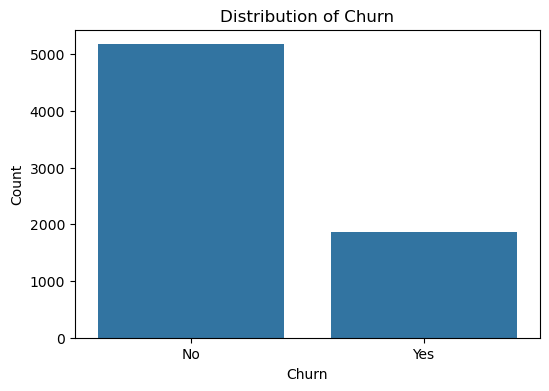

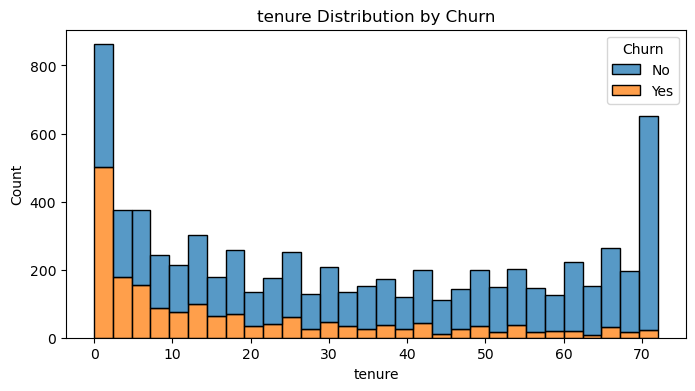

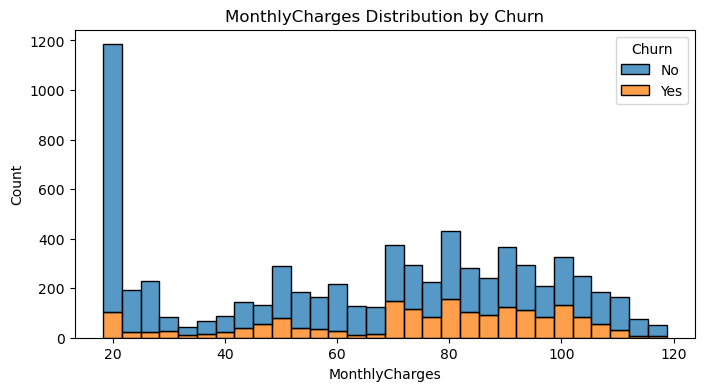

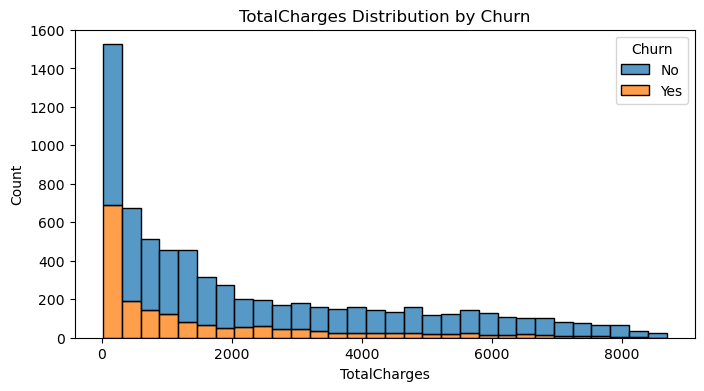

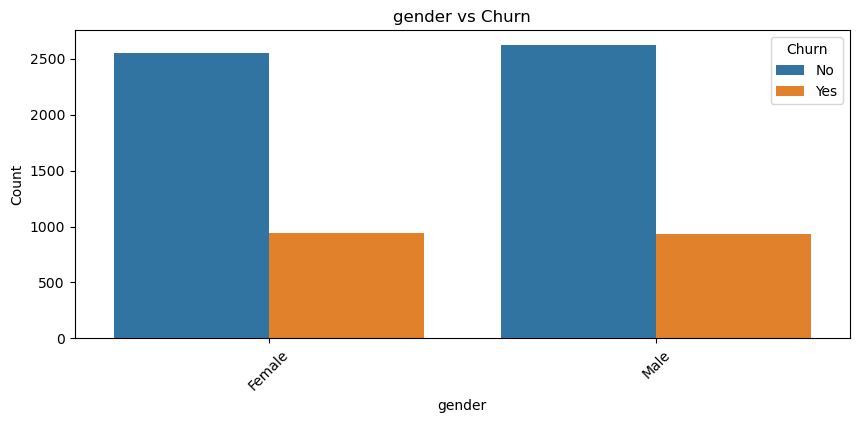

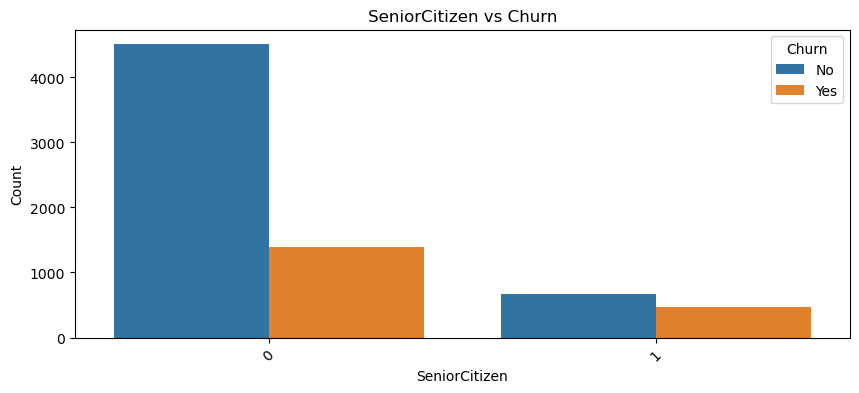

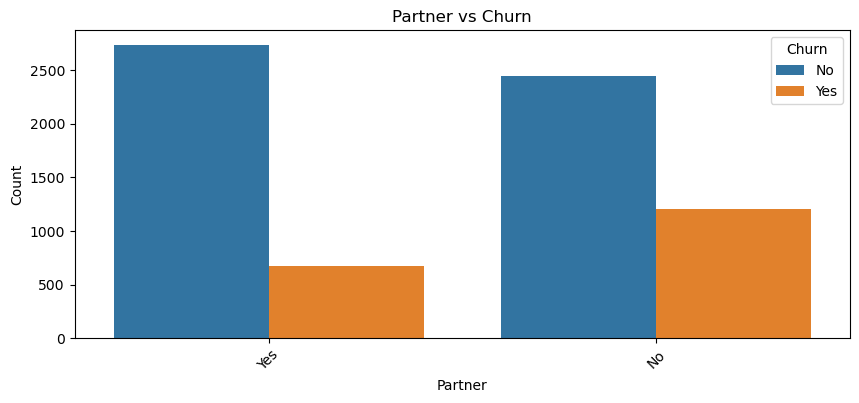

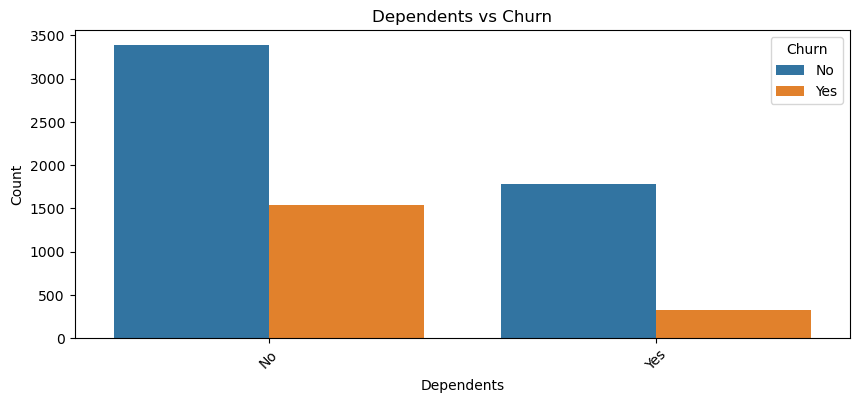

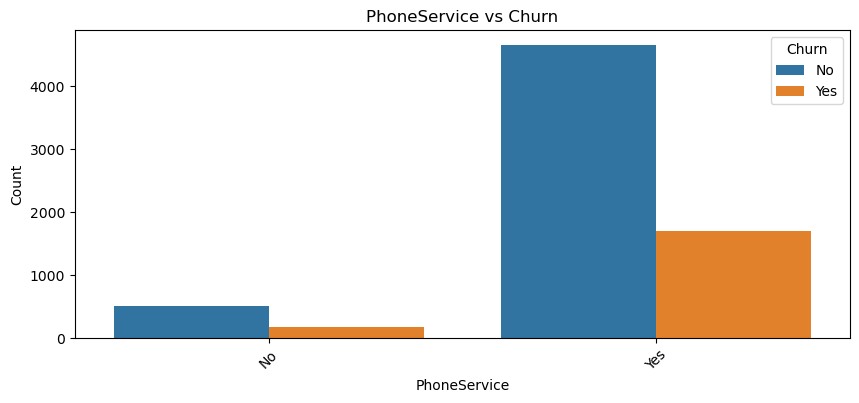

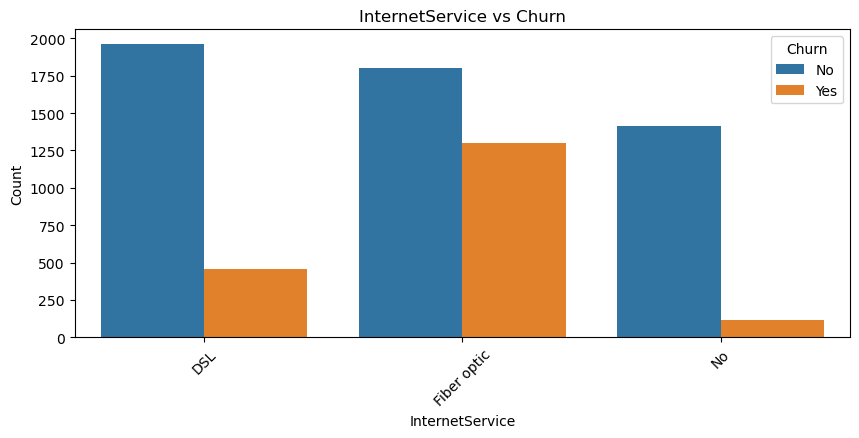

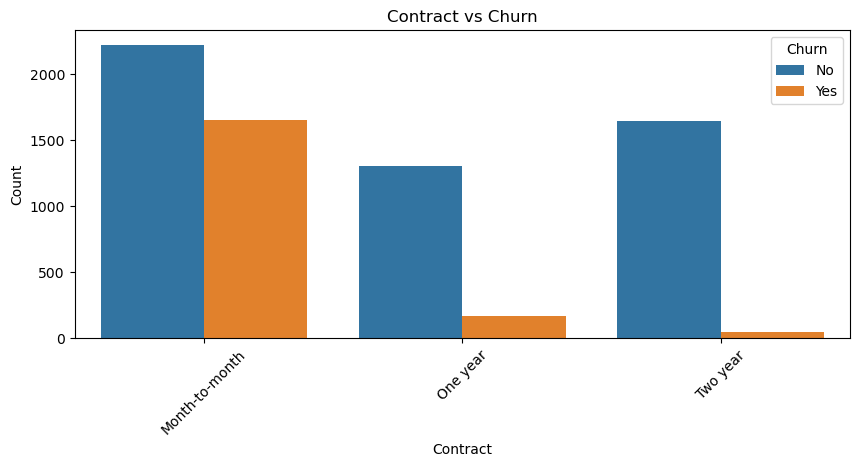

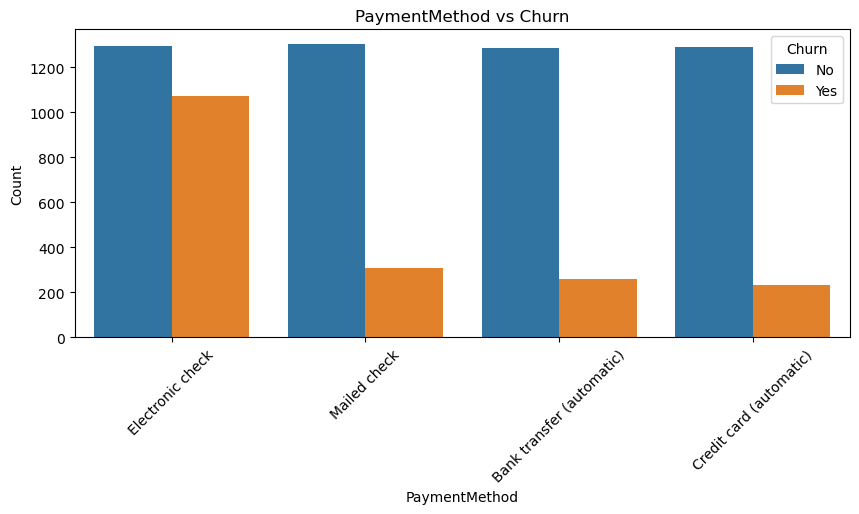

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Define numerical and categorical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'InternetService', 'Contract', 'PaymentMethod']

# Numerical features vs Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', bins=30)
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Categorical features vs Churn
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# Data Preprocessing

## Cleaning data

In [12]:
# Convert 'TotalCharges' to numeric (if not already done)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])

# Drop customerID as it's not useful for modeling
df = df.drop(columns=['customerID'])

# Confirm cleaning
print(" Data cleaned. New shape:", df.shape)


 Data cleaned. New shape: (7032, 20)


## Handle categorical features

In [14]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Binary categorical columns (label encoding)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# Multiclass categorical columns (one-hot encoding)
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

print(" Categorical features encoded. Shape:", df.shape)


 Categorical features encoded. Shape: (7032, 31)


## Normalising data

In [16]:
from sklearn.preprocessing import StandardScaler

# Numerical columns to normalize
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(" Numerical features normalized.")
df.head()


 Numerical features normalized.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,True,False,False,False,False,False,False,False,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,True,False,False,False,False,False,False,False,False
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,False,False


# Feature Engineering
* creating or transforming features to improve accuracy

## Tenure Grouping

In [19]:
# Group 'tenure' into bins
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[-1, 12, 24, 48, 60, 72],
                           labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

# Convert to string and one-hot encode
df['TenureGroup'] = df['TenureGroup'].astype(str)
df = pd.get_dummies(df, columns=['TenureGroup'], drop_first=True)

print(" Tenure grouped and encoded.")


 Tenure grouped and encoded.


## Total Services Count

In [21]:
# List of service features (ensure these exist in your encoded df)
service_features = ['PhoneService', 'MultipleLines_No phone service',
                    'InternetService_DSL', 'InternetService_Fiber optic',
                    'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',
                    'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No']

# Check for which columns are available
available_services = [col for col in service_features if col in df.columns]

# Count how many services each customer has (not marked as 'No')
df['TotalServices'] = df[available_services].apply(lambda row: len(row) - row.sum(), axis=1)

print(" Total services feature created.")


 Total services feature created.


## Long-Term Contract

In [23]:
# Create flag for customers on a two-year contract
df['IsLongTermContract'] = df['Contract_Two year'] if 'Contract_Two year' in df.columns else 0

print(" Long-term contract flag added.")


 Long-term contract flag added.


## AutoPay

In [25]:
# Create flag for customers using AutoPay
df['IsAutoPay'] = df['PaymentMethod_Bank transfer (automatic)'] if 'PaymentMethod_Bank transfer (automatic)' in df.columns else 0

print(" AutoPay flag added.")


 AutoPay flag added.


In [26]:
print("Feature matrix shape:", df.shape)
df.head()

Feature matrix shape: (7032, 35)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,TenureGroup_nan,TotalServices,IsLongTermContract,IsAutoPay
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,False,False,False,False,False,True,2,False,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,False,False,False,False,2,False,0
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,False,False,False,False,False,True,2,False,0
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,False,True,False,False,False,False,False,2,False,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,True,1,False,0


# Building the model

In [28]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


## Logistic Regression

In [30]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
y_prob_lr = logreg.predict_proba(X_test)[:, 1]


## XGBoost

In [32]:
# XGBoost with RandomizedSearchCV
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
search = RandomizedSearchCV(xgb, param_grid, n_iter=5, scoring='f1', cv=3, random_state=42, n_jobs=-1)
search.fit(X_train, y_train)
xgb_best = search.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)
y_prob_xgb = xgb_best.predict_proba(X_test)[:, 1]

## Voting Ensemble

In [34]:
# Voting ensemble
voting = VotingClassifier(estimators=[('lr', logreg), ('xgb', xgb_best)], voting='soft')
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
y_prob_voting = voting.predict_proba(X_test)[:, 1]


## Evaluation Metrics

In [36]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n Evaluation Report: {name}")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred):.4f}")
    print(f"AUC Score : {roc_auc_score(y_true, y_prob):.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate all
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
evaluate_model("XGBoost (Tuned)", y_test, y_pred_xgb, y_prob_xgb)
evaluate_model("Voting Classifier", y_test, y_pred_voting, y_prob_voting)



 Evaluation Report: Logistic Regression
Accuracy  : 0.7880
Precision : 0.7594
Recall    : 0.8432
F1 Score  : 0.7991
AUC Score : 0.8758
              precision    recall  f1-score   support

           0       0.82      0.73      0.78      1033
           1       0.76      0.84      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066


 Evaluation Report: XGBoost (Tuned)
Accuracy  : 0.8209
Precision : 0.8016
Recall    : 0.8529
F1 Score  : 0.8265
AUC Score : 0.8999
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1033
           1       0.80      0.85      0.83      1033

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066


 Evaluation Report: Voting Classifier
Accuracy  : 0.8204
Precision : 0.7909
R

## ROC Curve

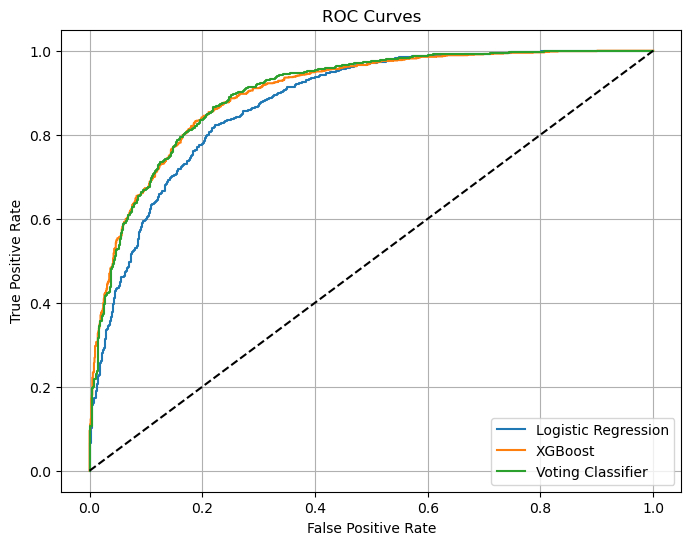

In [38]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_vote, tpr_vote, _ = roc_curve(y_test, y_prob_voting)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_vote, tpr_vote, label='Voting Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


## Top 10 most important features in XGBoost model

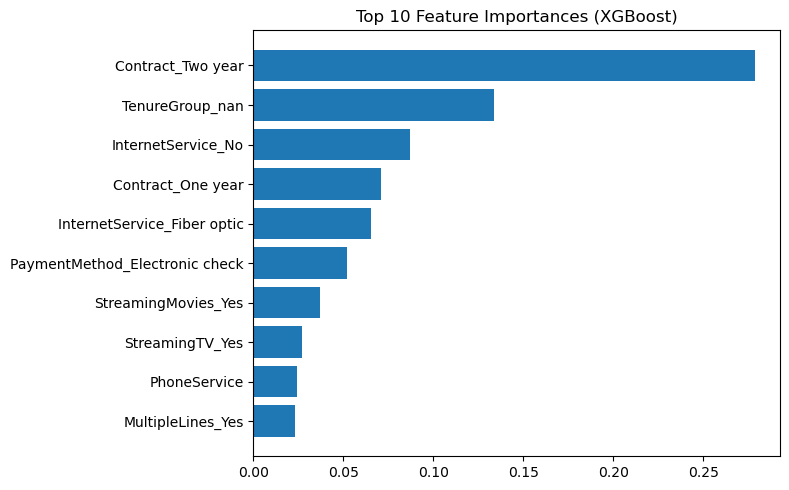

In [40]:
importances = xgb_best.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
plt.figure(figsize=(8, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()
